In [1]:
""" Name: Anay Abhijit Joshi """

# Professor     :   Jun Bai
# Course        :   CS 5173 (Deep Learning)
# Level         :   Undergraduate
# Student M-ID  :   M14391356

# Similar Course: CS 6073 (Deep Learning)

' Name: Anay Abhijit Joshi '

In [2]:
# Feel free to refer to a similar example of Linear Regression and Keras (Developer Guide) -
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# https://keras.io/guides/functional_api/

In [3]:
# Let's import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


# Let's import Keras (high-level API of TensorFlow Platform)
import keras
from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.losses import MeanSquaredError
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

In [4]:
# Let's specify the file path that conatins the data-set
file_path = "cancer_reg.csv"
# This dataset contains cancer mortality rates information. The goal of this project/challenge
# is to predict the results of Cancer Mortality Rates. Therefore, the label is “TARGET_deathRate”.
# I will load the dataset into a pandas data-frame, and handle special-character encoding
file = pd.read_csv(filepath_or_buffer=file_path, encoding="latin1")

In [5]:
# Now, let's handle missing values by using the mean of the data in the specific column(s)
# This must be done for avoiding the ValueError(s) caused by NaN values during the model's training.
for missing_value_column in range(file.shape[1]):
  # .iloc[] is an indexer used for integer-location-based indexing of data in a DataFrame.
  # More details available on - https://www.naukri.com/code360/library/iloc-function-in-python
  # Let's use the zero-based indexing to start from index 0
  missing_value_NaN = file.iloc[:,missing_value_column]
  if missing_value_NaN.isnull().any():
    # Now, if missing value, then fill it with column's data's "mean"
    # The fillna() method replaces the NULL values with a specified value.
    # More details on - https://www.w3schools.com/python/pandas/ref_df_fillna.asp
        file.iloc[:,missing_value_column].fillna(file.iloc[:,missing_value_column].mean(), inplace=True)

# Now, let's encode the 'Geography' and 'binnedInc' columns using LabelEncoder
# to convert categorical values into numerical format, as I want to focus only on numerical values.
# More details on - https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
file["Geography"] = LabelEncoder().fit_transform(file["Geography"])
file["binnedInc"] = LabelEncoder().fit_transform(file["binnedInc"])

# Let's separate the features and target label
cancer_reg_X = file.drop(labels="TARGET_deathRate", axis=1)
cancer_reg_y = file["TARGET_deathRate"]

# Log transformation is a method used to reduce skewness and bring the data distribution closer to normal.
# More details on -
# https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
cancer_reg_X = np.log1p(cancer_reg_X)
cancer_reg_y = np.log1p(cancer_reg_y)

# More details available on -
# https://medium.com/@tubelwj/five-methods-for-data-splitting-in-machine-learning-27baa50908ed
""" Allocating 20% of the data (i.e., test_size=0.2) to the temporary set gives a 'Test R-sqaured = '0.7960995180287159' and MSE = '0.0049853148112553635' """
# cancer_reg_X_train, cancer_reg_X_temp, cancer_reg_y_train, cancer_reg_y_temp = train_test_split(cancer_reg_X, cancer_reg_y, test_size=0.2, random_state=42)
""" Allocating 30% of the data (i.e., test_size=0.3) to the temporary set gives a 'Test R-sqaured = 0.8308123760338987 (higher)' and MSE = '0.004764955733649113 (lower)' """
cancer_reg_X_train, cancer_reg_X_temp, cancer_reg_y_train, cancer_reg_y_temp = train_test_split(cancer_reg_X, cancer_reg_y, test_size=0.3, random_state=42)
""" Subsequently, the temporary set is further split into a validation set and a test set with each set containing 50% of the data (i.e., test_size = 0.5)
    The random_state=42 parameter ensures reproducibility of the random splitting results. """
cancer_reg_X_val, cancer_reg_X_test, cancer_reg_y_val, cancer_reg_y_test = train_test_split(cancer_reg_X_temp, cancer_reg_y_temp, test_size=0.5, random_state=42)

# More details available on -
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
scaler = StandardScaler()
# This will standardize the data and scale it to unit variance.
cancer_reg_X_train = scaler.fit_transform(X=cancer_reg_X_train)
cancer_reg_X_val = scaler.transform(X=cancer_reg_X_val)
cancer_reg_X_test = scaler.transform(X=cancer_reg_X_test)

# Create Linear Regression object
linear_regression = LinearRegression()
# Now, let's fit it using the training dataset.
linear_regression.fit(X=cancer_reg_X_train, y=cancer_reg_y_train)

LinearRegression()

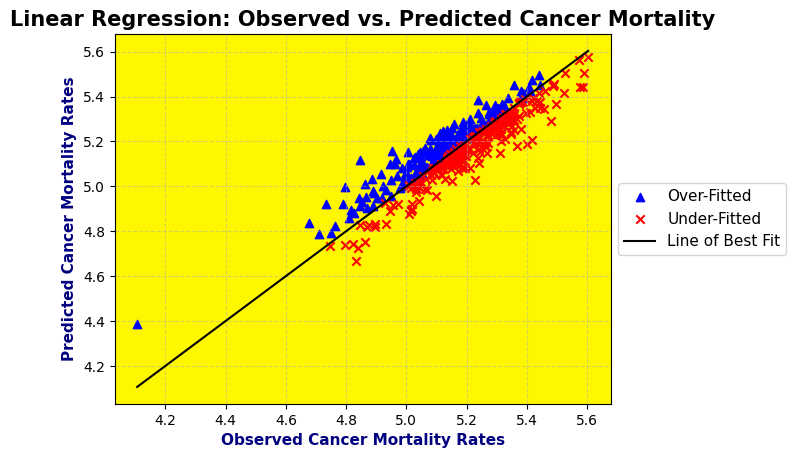

 
 
                                    'MSE' = 0.004764955733649113
                         'Test R-squared' = 0.8308123760338987
 
 
                           Timestamp: 2024-09-20 01:08:55.270125


In [6]:
""" VALIDATION DATA SET """

# Make predictions now
# Referred to StackExchange -
# https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set

## --> Validation Data Set
cancer_reg_y_pred = linear_regression.predict(cancer_reg_X_val)
MSE = mean_squared_error(y_true=cancer_reg_y_val, y_pred=cancer_reg_y_pred)
R2 = r2_score(y_true=cancer_reg_y_val, y_pred=cancer_reg_y_pred)

# 'above_line_of_best_fit' captures cases where the model over-predicts (predictions greater than actual values).
above_line_of_best_fit = cancer_reg_y_pred > cancer_reg_y_val
# 'below_line_of_best_fit' captures cases where the model under-predicts (predictions less than or equal to actual values).
below_line_of_best_fit = cancer_reg_y_pred <= cancer_reg_y_val

# Let's plot the data now
plt.scatter(cancer_reg_y_val[above_line_of_best_fit], cancer_reg_y_pred[above_line_of_best_fit], c="blue", marker="^", label="Over-Fitted")
plt.scatter(cancer_reg_y_val[below_line_of_best_fit], cancer_reg_y_pred[below_line_of_best_fit], c="red", marker="x", label="Under-Fitted")

# Plot's Line of Best Fit
plt.plot([min(cancer_reg_y_val), max(cancer_reg_y_val)], [min(cancer_reg_y_val), max(cancer_reg_y_val)], color="black", linewidth=1.5, label="Line of Best Fit")
## <--

# Plot's Labels
plt.xlabel("Observed Cancer Mortality Rates", fontsize=11, color="navy", fontweight="bold")
plt.ylabel("Predicted Cancer Mortality Rates", fontsize=11, color="navy", fontweight="bold")
plt.title("Linear Regression: Observed vs. Predicted Cancer Mortality", fontsize=15, color="black", fontweight="bold")

# Plot's Legend
plt.legend(loc="center left", bbox_to_anchor=(1,0.5), fontsize=11)

# Plot's Grid
plt.grid(True, linestyle="--", alpha=0.5)
# Plot's Background Color
plt.gca().set_facecolor("#FFF700")
plt.show()

# Here, finally, let's print the Mean Squared Error (MSE) and R-Squared value
print(f" ")
print(f" ")
print(f"                                    'MSE' = {MSE}")
print(f"                         'Test R-squared' = {R2}")
# Timestamp
timestamp = datetime.now()
print(f" ")
print(f" ")
print("                           Timestamp:", timestamp)

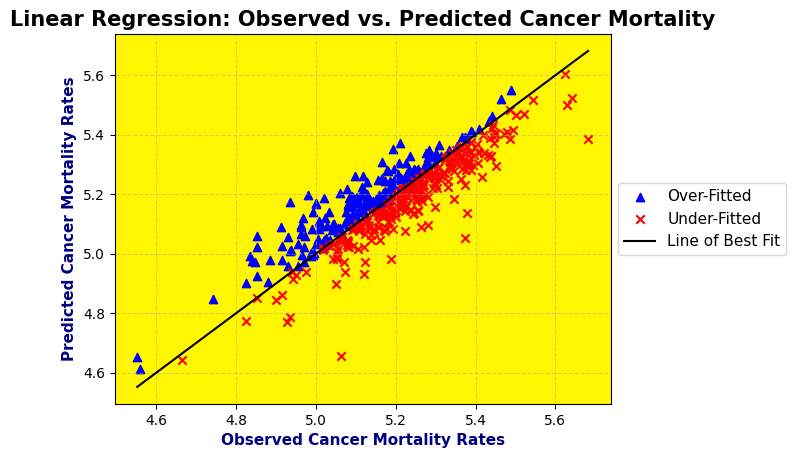

 
 
                                    'MSE' = 0.005662627419371372
                         'Test R-squared' = 0.770306897015671
 
 
                           Timestamp: 2024-09-20 01:09:10.949648


In [7]:
# """ TEST DATA SET """

# # Make predictions now
# # Referred to StackExchange -
# # https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set

# ## --> Test Data Set
# cancer_reg_y_pred = linear_regression.predict(cancer_reg_X_test)
# MSE = mean_squared_error(y_true=cancer_reg_y_test, y_pred=cancer_reg_y_pred)
# R2 = r2_score(y_true=cancer_reg_y_test, y_pred=cancer_reg_y_pred)

# # 'above_line_of_best_fit' captures cases where the model over-predicts (predictions greater than actual values).
# above_line_of_best_fit = cancer_reg_y_pred > cancer_reg_y_test
# # 'below_line_of_best_fit' captures cases where the model under-predicts (predictions less than or equal to actual values).
# below_line_of_best_fit = cancer_reg_y_pred <= cancer_reg_y_test

# # Let's plot the data now
# plt.scatter(cancer_reg_y_test[above_line_of_best_fit], cancer_reg_y_pred[above_line_of_best_fit], c="blue", marker="^", label="Over-Fitted")
# plt.scatter(cancer_reg_y_test[below_line_of_best_fit], cancer_reg_y_pred[below_line_of_best_fit], c="red", marker="x", label="Under-Fitted")

# # Plot's Line of Best Fit
# plt.plot([min(cancer_reg_y_test), max(cancer_reg_y_test)], [min(cancer_reg_y_test), max(cancer_reg_y_test)], color="black", linewidth=1.5, label="Line of Best Fit")
# ## <--

# # Plot's Labels
# plt.xlabel("Observed Cancer Mortality Rates", fontsize=11, color="navy", fontweight="bold")
# plt.ylabel("Predicted Cancer Mortality Rates", fontsize=11, color="navy", fontweight="bold")
# plt.title("Linear Regression: Observed vs. Predicted Cancer Mortality", fontsize=15, color="black", fontweight="bold")

# # Plot's Legend
# plt.legend(loc="center left", bbox_to_anchor=(1,0.5), fontsize=11)

# # Plot's Grid
# plt.grid(True, linestyle="--", alpha=0.5)
# # Plot's Background Color
# plt.gca().set_facecolor("#FFF700")
# plt.show()

# # Here, finally, let's print the Mean Squared Error (MSE) and R-Squared value
# print(f" ")
# print(f" ")
# print(f"                                    'MSE' = {MSE}")
# print(f"                         'Test R-squared' = {R2}")

# # Timestamp
# timestamp = datetime.now()
# print(f" ")
# print(f" ")
# print("                           Timestamp:", timestamp)

In [8]:
# DNN-16: The deep fully connected neural network contains one layer which has 16 nodes.
# There is an output layer for final predictions as well...
# input_dim: tells the number of dimensions or features the dataset has.
# https://datascience.stackexchange.com/questions/106726/keras-how-to-define-input-shape-for-1st-dense-layer
# https://keras.io/guides/sequential_model/
DNN_16 = Sequential(
    layers =
    [
        layers.Dense(16, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "first_layer"),
        layers.Dense(1, name = "output_layer"),
    ],
    name = "DNN-16"
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# DNN-30-8: The deep fully connected neural network contains two hidden layers;
# the first hidden layer uses 30 nodes, and the second layer uses 8 nodes.
# There is an output layer for final predictions as well...
# input_dim: tells the number of dimensions or features the dataset has.
# https://datascience.stackexchange.com/questions/106726/keras-how-to-define-input-shape-for-1st-dense-layer
# https://keras.io/guides/sequential_model/
DNN_30_8 = Sequential(
    layers =
    [
        layers.Dense(30, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "first_layer"),
        layers.Dense(8, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "second_layer"),
        layers.Dense(1, name = "output_layer"),
    ],
    name = "DNN-30-8"
)

In [10]:
# DNN-30-16-8: The deep fully connected neural network contains three layers;
# the first hidden layer uses 30 nodes, and the second layer uses 16 nodes, and the third layer has 8 nodes.
# There is an output layer for final predictions as well...
# input_dim: tells the number of dimensions or features the dataset has.
# https://datascience.stackexchange.com/questions/106726/keras-how-to-define-input-shape-for-1st-dense-layer
# https://keras.io/guides/sequential_model/
DNN_30_16_8 = Sequential(
    layers =
    [
        layers.Dense(30, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "first_layer"),
        layers.Dense(16, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "second_layer"),
        layers.Dense(8, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "third_layer"),
        layers.Dense(1, name = "output_layer"),
    ],
    name = "DNN-30-16-8"
)

In [11]:
# DNN-30-16-8-4: The deep fully connected neural network contains two hidden layers;
# the first hidden layer uses 30 nodes, and the second layer uses 16 nodes, and the third layer has 8 nodes, and the fourth layer has 4 nodes.
# There is an output layer for final predictions as well...
# input_dim: tells the number of dimensions or features the dataset has.
# https://datascience.stackexchange.com/questions/106726/keras-how-to-define-input-shape-for-1st-dense-layer
# https://keras.io/guides/sequential_model/
DNN_30_16_8_4 = Sequential(
    layers =
    [
        layers.Dense(30, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "first_layer"),
        layers.Dense(16, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "second_layer"),
        layers.Dense(8, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "third_layer"),
        layers.Dense(4, activation = "relu", input_dim = cancer_reg_X_train.shape[1], name = "fourth_layer"),
        layers.Dense(1, name = "output_layer"),
    ],
    name = "DNN-30-16-8-4"
)

In [12]:
def test_model (*, training_model, learning_rate, batch_size, epochs):
  # Details for Regression Losses on -
  # https://keras.io/api/losses/regression_losses/#meansquarederror-class
  training_model.compile(
      # Optimizer
      optimizer = keras.optimizers.Adam(learning_rate=learning_rate),
      # Loss function to minimize
      loss = keras.losses.MeanSquaredError(),
      # metrics = [keras.metrics.MeanAbsoluteError()],
      )

  # More details available on -
  # https://keras.io/api/models/model_training_apis/
  # Let's train the model now.
  history = training_model.fit(
      x=cancer_reg_X_train,
      y=cancer_reg_y_train,
      batch_size=batch_size,
      epochs=epochs,
      # We pass some validation for monitoring validation loss and metrics at the end of each epoch.
      # In short, the validation data is used to monitor the model's performance during training without affecting the training process.
      validation_data = (cancer_reg_X_val, cancer_reg_y_val),
      )

  # Let's plot the loss values for both training and validation sets across all epochs.
  plt.plot(history.history["loss"], label="Training Set Loss", color="blue", linestyle=":", linewidth=2, marker="^", markersize=5)
  plt.plot(history.history["val_loss"], label="Validation Set Loss", color="red", linestyle="--", linewidth=2, marker="x", markersize=5)

  # Plot's Labels
  plt.xlabel("Epochs (No. of Iterations)", fontsize=11, color="navy", fontweight="bold")
  plt.ylabel("Loss", fontsize=11, color="navy", fontweight="bold")

  # Plot's Title
  plt.title("Training vs. Validation Loss", fontsize=15, color="black", fontweight="bold")

  # Plot's Legend
  plt.legend(loc="center left", bbox_to_anchor=(1,0.5), frameon=False, fontsize=11)

  # Plot's Grid
  plt.grid(True, linestyle='--', alpha=0.5)

  # Plot's Background Color
  plt.gca().set_facecolor("#FFF700")

  plt.show()

  # Make Predictions
  # Referred to StackExchange -
  # https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set
  cancer_reg_y_pred = training_model.predict(cancer_reg_X_val)
  MSE = mean_squared_error(y_true=cancer_reg_y_val, y_pred=cancer_reg_y_pred)
  R2 = r2_score(y_true=cancer_reg_y_val, y_pred=cancer_reg_y_pred)

  # Finally, let's print the MSE and R-Squared Value
  print(f" ")
  print(f"                                    'MSE' = {MSE}")
  print(f"                         'Test R-squared' = {R2}")

  # Timestamp
  timestamp = datetime.now()
  print(f" ")
  print(f" ")
  print("                           Timestamp:", timestamp)

  # return MSE, R2

In [ ]:
# Let's test each and every given model now!

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2256 - val_loss: 0.7400
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5850 - val_loss: 0.2941
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2270 - val_loss: 0.1585
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1381 - val_loss: 0.0797
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0658 - val_loss: 0.0615
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0412 - val_loss: 0.0323
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 - val_loss: 0.0226
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0237 - val_loss: 0.0203
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 - val_loss: 0.0223
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227 - val_loss: 0.0234
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 - val_loss: 0.0198
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

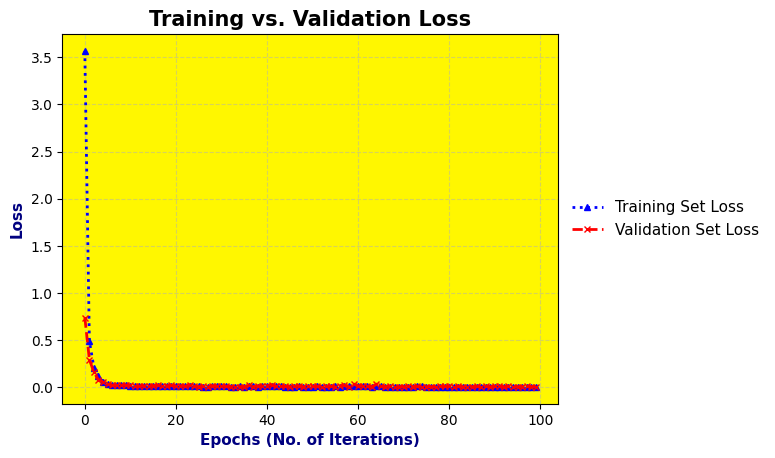

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 
                                    'MSE' = 0.006732718330837954
                         'Test R-squared' = 0.7609437147162864
 
 
                           Timestamp: 2024-09-20 01:13:23.052868


In [13]:
test_model(training_model=DNN_16, learning_rate=0.1, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0054 - val_loss: 0.0063
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_loss: 0.0059
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - val_loss: 0.0056
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0058
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - val_loss: 0.0058
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0054
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0062
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0055
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - val_loss: 0.0059
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

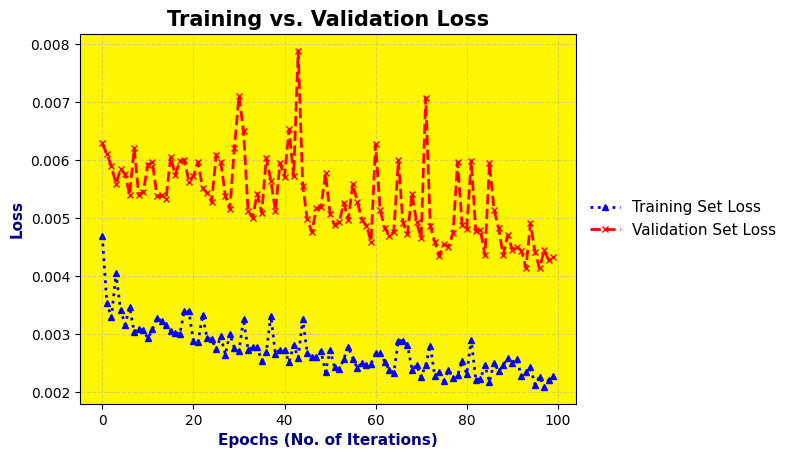

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 
                                    'MSE' = 0.004329931219997128
                         'Test R-squared' = 0.8462586399544709
 
 
                           Timestamp: 2024-09-20 01:15:11.858162


In [14]:
test_model(training_model=DNN_16, learning_rate=0.01, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0042
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

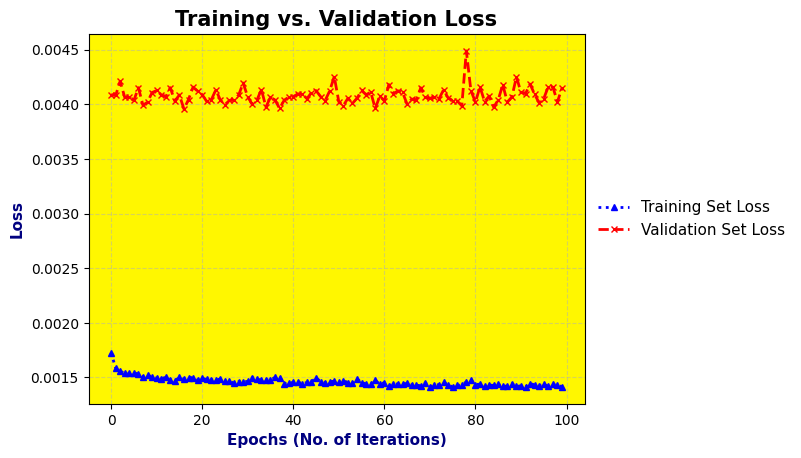

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 
                                    'MSE' = 0.0041490313299556375
                         'Test R-squared' = 0.8526817893566186
 
 
                           Timestamp: 2024-09-20 01:17:58.233947


In [15]:
test_model(training_model=DNN_16, learning_rate=0.001, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0041
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0041
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

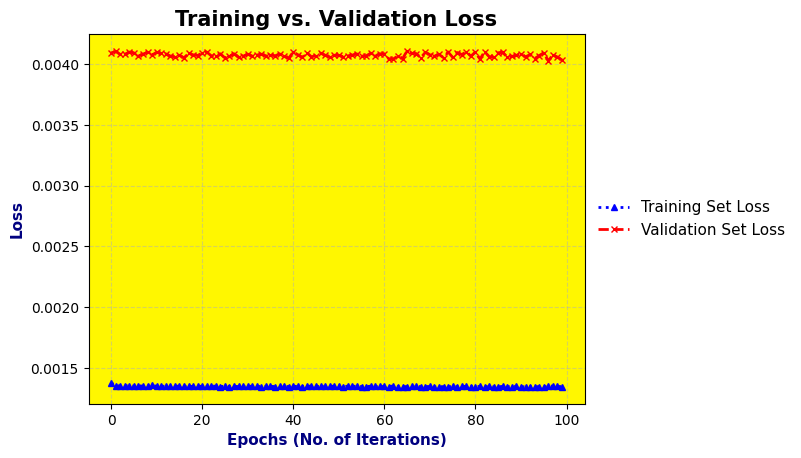

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 
                                    'MSE' = 0.004035129469621198
                         'Test R-squared' = 0.8567260630482327
 
 
                           Timestamp: 2024-09-20 01:19:14.243381


In [16]:
test_model(training_model=DNN_16, learning_rate=0.0001, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.0132 - val_loss: 0.8572
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7682 - val_loss: 0.2981
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2324 - val_loss: 0.1917
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1426 - val_loss: 0.0976
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0741 - val_loss: 0.0814
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0552 - val_loss: 0.0481
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262 - val_loss: 0.0335
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - val_loss: 0.0335
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - val_loss: 0.0261
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - val_loss: 0.0230
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

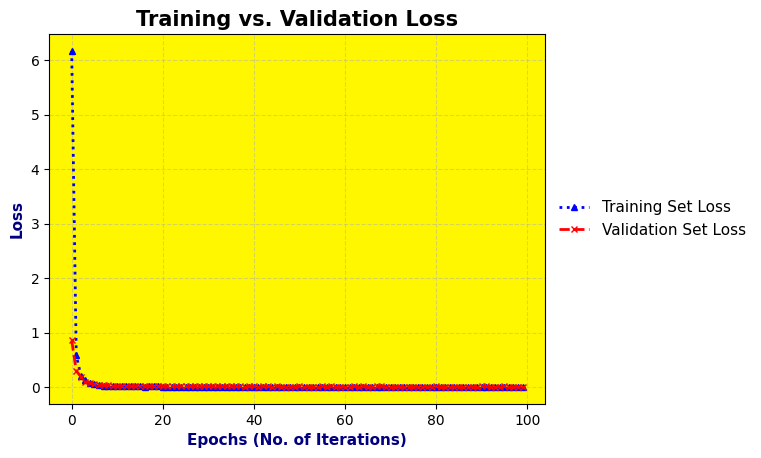

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 
                                    'MSE' = 0.009102123753496269
                         'Test R-squared' = 0.6768140614561169
 
 
                           Timestamp: 2024-09-20 01:20:34.547162


In [17]:
test_model(training_model=DNN_30_8, learning_rate=0.1, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - val_loss: 0.0056
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0053
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0059
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - val_loss: 0.0058
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0022 - val_loss: 0.0057
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0058
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0057
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0057
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - val_loss: 0.0056
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0053
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0069
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

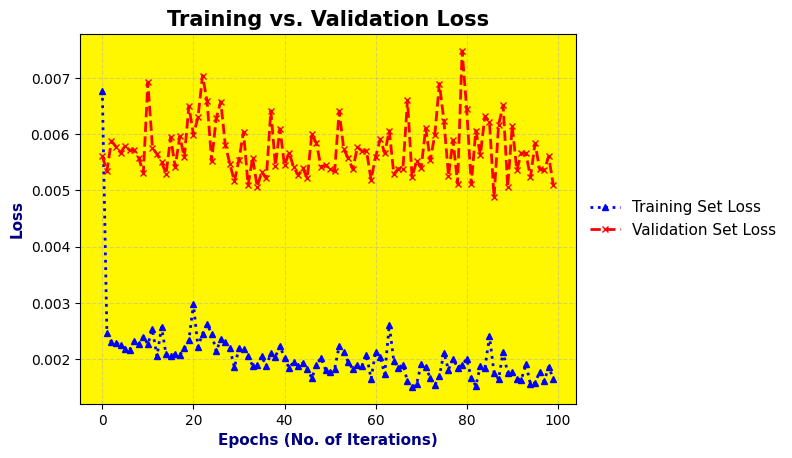

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 
                                    'MSE' = 0.005099043628700995
                         'Test R-squared' = 0.8189500334814785
 
 
                           Timestamp: 2024-09-20 01:22:02.969273


In [18]:
test_model(training_model=DNN_30_8, learning_rate=0.01, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0051
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7243e-04 - val_loss: 0.0049
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4518e-04 - val_loss: 0.0050
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.9924e-04 - val_loss: 0.0050
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0052
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8499e-04 - val_loss: 0.0051
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9855e-04 - val_loss: 0.0050
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 

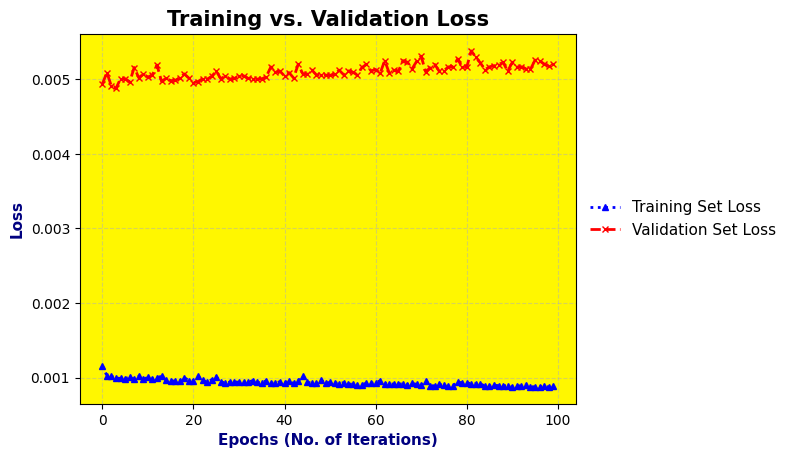

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 
                                    'MSE' = 0.005202525835337959
                         'Test R-squared' = 0.8152757268053347
 
 
                           Timestamp: 2024-09-20 01:23:05.617037


In [19]:
test_model(training_model=DNN_30_8, learning_rate=0.001, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.7793e-04 - val_loss: 0.0052
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8160e-04 - val_loss: 0.0052
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5520e-04 - val_loss: 0.0052
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9694e-04 - val_loss: 0.0053
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2160e-04 - val_loss: 0.0052
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7000e-04 - val_loss: 0.0052
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9028e-04 - val_loss: 0.0052
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1611e-04 - val_loss: 0.0052
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0955e-04 - val_loss: 0.0052
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9526e-04 - val_loss: 0.0052
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3511e-04 - val_loss: 0.0052
Epoch 12/100
34/34 

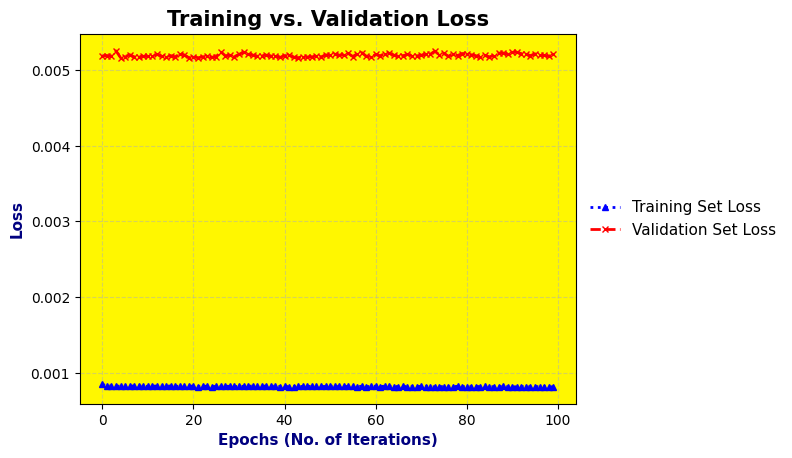

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 
                                    'MSE' = 0.005209745914397893
                         'Test R-squared' = 0.8150193659723532
 
 
                           Timestamp: 2024-09-20 01:24:17.315128


In [20]:
test_model(training_model=DNN_30_8, learning_rate=0.0001, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.4132 - val_loss: 0.4411
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3438 - val_loss: 0.1678
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1113 - val_loss: 0.0738
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0593 - val_loss: 0.0668
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0563 - val_loss: 0.0356
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - val_loss: 0.0283
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199 - val_loss: 0.0255
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - val_loss: 0.0318
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - val_loss: 0.0211
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - val_loss: 0.0196
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - val_loss: 0.0302
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

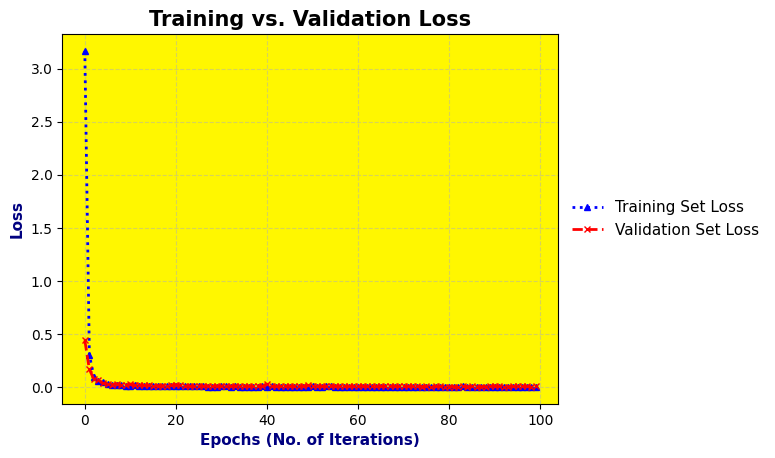

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 
                                    'MSE' = 0.009080411856836763
                         'Test R-squared' = 0.6775849782102178
 
 
                           Timestamp: 2024-09-20 01:25:54.269851


In [21]:
test_model(training_model=DNN_30_16_8, learning_rate=0.1, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0046 - val_loss: 0.0056
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0055
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0052
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0058
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0061
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0051
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

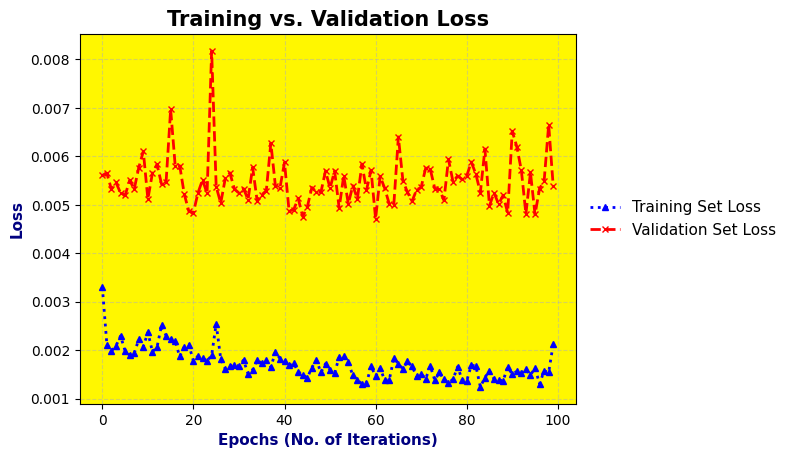

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 
                                    'MSE' = 0.005379248879072817
                         'Test R-squared' = 0.8090008832305213
 
 
                           Timestamp: 2024-09-20 01:27:15.531504


In [22]:
test_model(training_model=DNN_30_16_8, learning_rate=0.01, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3059e-04 - val_loss: 0.0049
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4588e-04 - val_loss: 0.0050
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8529e-04 - val_loss: 0.0049
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6564e-04 - val_loss: 0.0051
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4531e-04 - val_loss: 0.0049
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3944e-04 - val_loss: 0.0048
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7503e-04 - val_loss: 0.0050
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.8958e-04 - val_loss: 0.0048
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6949e-04 - val_loss: 0.0049
Epoch 12/100
34/34 ━━━━━━━━

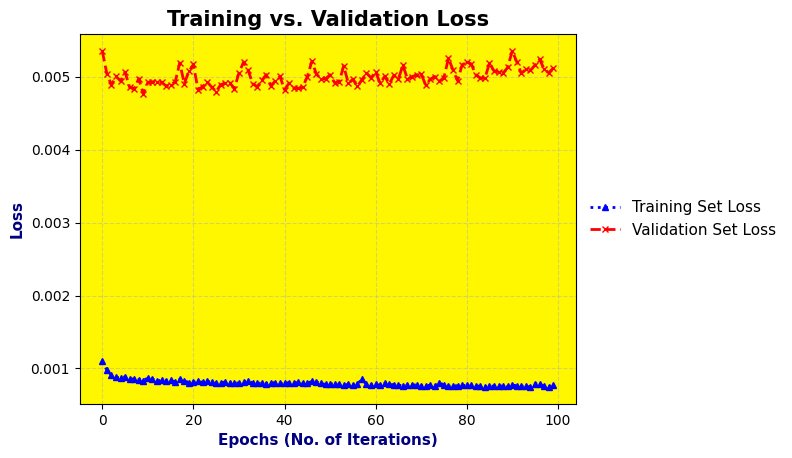

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 
                                    'MSE' = 0.005117482270900689
                         'Test R-squared' = 0.8182953390336587
 
 
                           Timestamp: 2024-09-20 01:28:11.953610


In [23]:
test_model(training_model=DNN_30_16_8, learning_rate=0.001, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 6.8230e-04 - val_loss: 0.0051
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8544e-04 - val_loss: 0.0051
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2366e-04 - val_loss: 0.0051
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1009e-04 - val_loss: 0.0051
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1247e-04 - val_loss: 0.0051
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9389e-04 - val_loss: 0.0051
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.6953e-04 - val_loss: 0.0051
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7508e-04 - val_loss: 0.0051
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0958e-04 - val_loss: 0.0051
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0305e-04 - val_loss: 0.0051
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2990e-04 - val_loss: 0.0051
Epoch 12/100
34/3

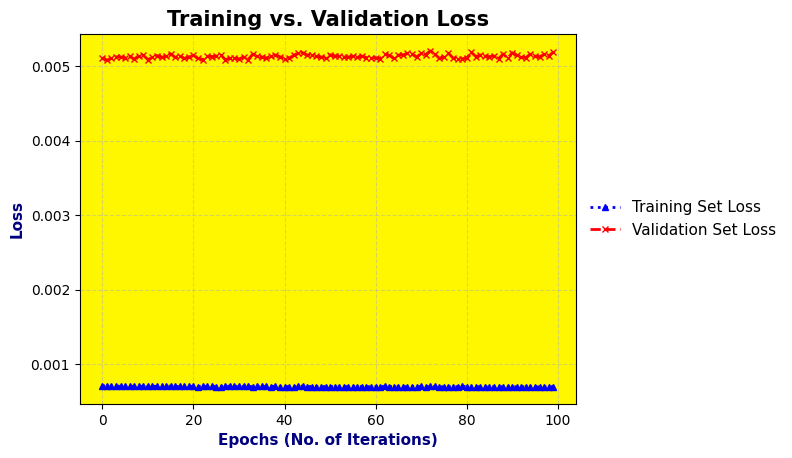

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 
                                    'MSE' = 0.005188202691784384
                         'Test R-squared' = 0.8157842936758392
 
 
                           Timestamp: 2024-09-20 01:29:21.900199


In [24]:
test_model(training_model=DNN_30_16_8, learning_rate=0.0001, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.9782 - val_loss: 0.3995
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2207 - val_loss: 0.0524
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0387 - val_loss: 0.0251
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 - val_loss: 0.0191
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - val_loss: 0.0213
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 - val_loss: 0.0163
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - val_loss: 0.0162
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 - val_loss: 0.0162
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - val_loss: 0.0154
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - val_loss: 0.0153
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 - val_loss: 0.0161
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

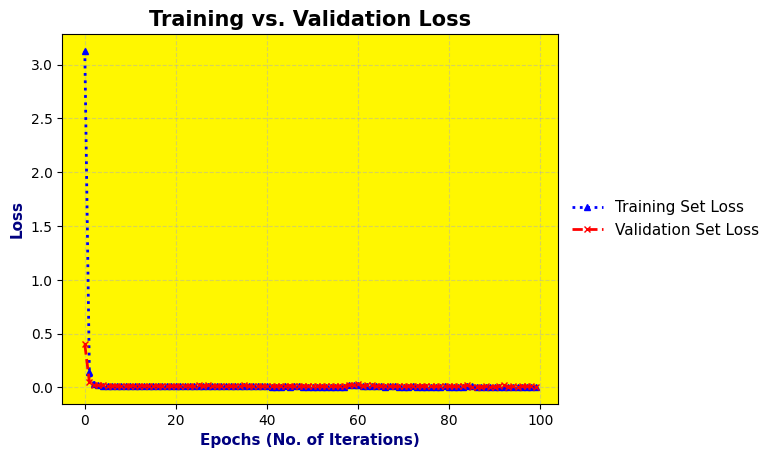

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
 
                                    'MSE' = 0.0075998961901140565
                         'Test R-squared' = 0.7301531324384998
 
 
                           Timestamp: 2024-09-20 01:31:38.737874


In [25]:
test_model(training_model=DNN_30_16_8_4, learning_rate=0.1, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0066 - val_loss: 0.0057
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0065
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0058
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0058
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.0057
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0053
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0056
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0054
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0069
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

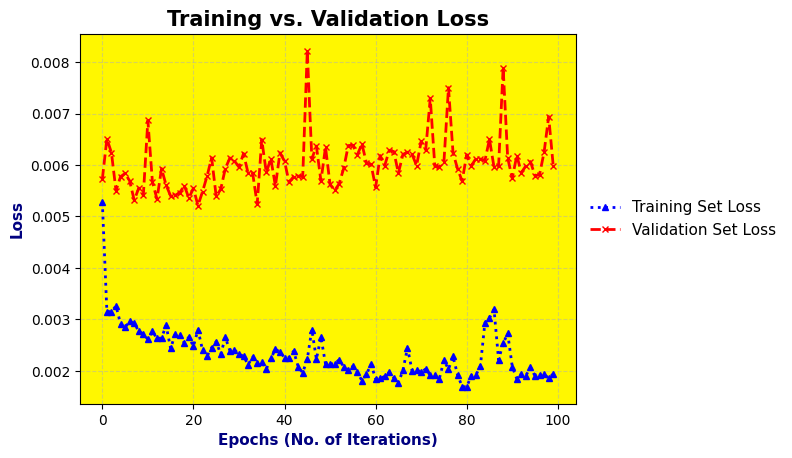

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
 
                                    'MSE' = 0.005983951055943129
                         'Test R-squared' = 0.7875299336077706
 
 
                           Timestamp: 2024-09-20 01:33:14.585193


In [26]:
test_model(training_model=DNN_30_16_8_4, learning_rate=0.01, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0013 - val_loss: 0.0061
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0061
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0062
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0062
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0062
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

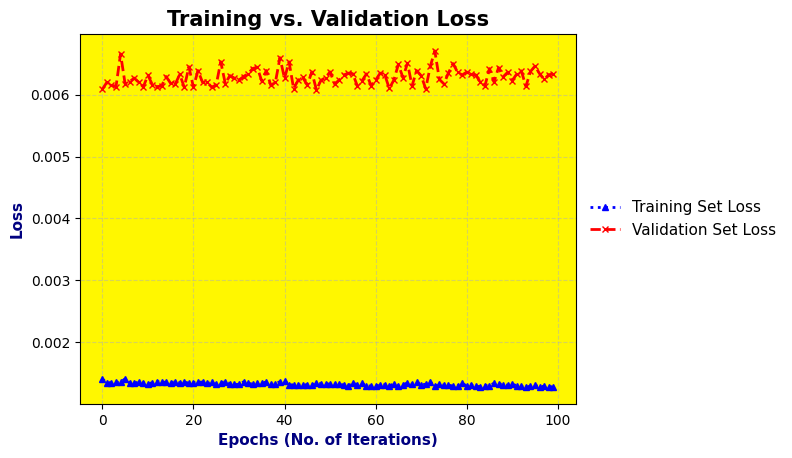

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 
                                    'MSE' = 0.006335886607711607
                         'Test R-squared' = 0.775033880523284
 
 
                           Timestamp: 2024-09-20 01:34:59.585492


In [28]:
test_model(training_model=DNN_30_16_8_4, learning_rate=0.001, batch_size=64, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - val_loss: 0.0063
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

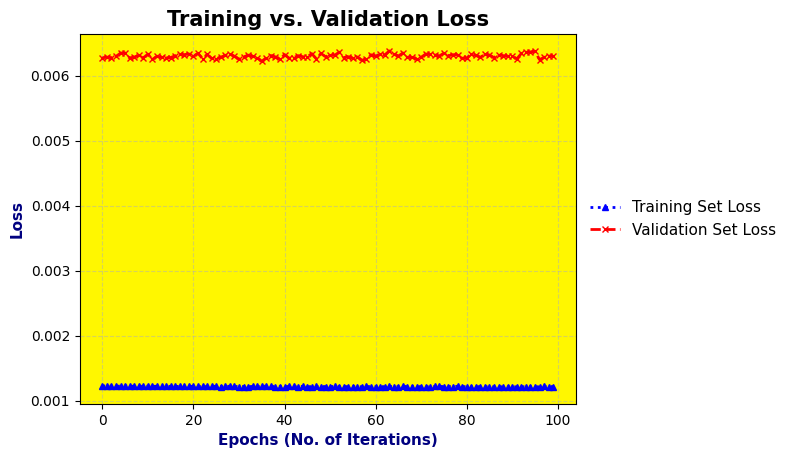

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
 
                                    'MSE' = 0.006302305624415157
                         'Test R-squared' = 0.7762262288035106
 
 
                           Timestamp: 2024-09-20 01:37:17.508872


In [29]:
test_model(training_model=DNN_30_16_8_4, learning_rate=0.0001, batch_size=64, epochs=100)